<a href="https://colab.research.google.com/github/Alfa4026/NLP_2025/blob/main/Tugas/Tugas_1_NLP_Alif_Alamsyah_11220940000028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas

Misalkan kita ingin bahwa kata yang terdapat pada review hanya berisi kata benda dan sifat
saja. Jelaskan bagaimana caranya dan implementasikan dengan Python. Eksplor data yang
sudah difilter tersebut, jika ada.

|Nama|NIM|
|----|----|
|Alif Alamsyah|11220940000028|

# Jawaban

## Text Cleaning dan Preprocessing

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
path = "https://raw.githubusercontent.com/Alfa4026/NLP_2025/main/Tugas/Datasets/IMDB%20Dataset.csv"
data_review = pd.read_csv(path)

In [3]:
data_review.head(n=10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text) # hapus HTML Tags
    text = re.sub(r'[^a-zA-Z\s]', '', text) # hapus karakter asing
    text = text.lower() # ubah ke huruf kecil
    text = " ".join([kata for kata in text.split() if kata not in stopwords]) # hapus stopwords atau kata umum yang tidak memiliki makna penting dalam analisis
    return text

In [5]:
data_review['cleaned_review'] = data_review['review'].apply(preprocess_text)

In [6]:
data_review.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [7]:
# Konversi label sentimen ke binary (1 = positive, 0 = negative)
data_review['sentiment'] = data_review['sentiment'].map({'positive': 1, 'negative': 0})

In [8]:
data_review_cleaned = data_review[['cleaned_review', 'sentiment']].copy()

In [9]:
data_review_cleaned

,cleaned_review,sentiment
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment side maltin...,0


## Periksa Ejaan

Digunakan modul SymSpell untuk memperbaiki kata-kata yang salah eja. Ini membantu meningkatkan kualitas data sebelum dilakukan analisis lebih lanjut.

In [12]:
import pandas as pd
from symspellpy import SymSpell, Verbosity

In [18]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt

--2025-04-17 08:38:15--  https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332881 (1.3M) [text/plain]
Saving to: ‘data/frequency_dictionary_en_82_765.txt’

frequency_dictionar 100%[===================>]   1.27M  --.-KB/s    in 0.07s   

2025-04-17 08:38:16 (19.2 MB/s) - ‘data/frequency_dictionary_en_82_765.txt’ saved [1332881/1332881]



In [22]:
# Inisialisasi SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Define term_index and count_index
term_index = 0  # Column of the term in the dictionary file
count_index = 1  # Column of the frequency count in the dictionary file

# Load the dictionary
dictionary_path = "data/frequency_dictionary_en_82_765.txt"
if not sym_spell.load_dictionary(dictionary_path, term_index, count_index):
    print("Error: Dictionary file not found or could not be loaded.")
else:
    print("Dictionary loaded successfully.")


Dictionary loaded successfully.


In [23]:
# Fungsi untuk deteksi kata yang salah eja
def detect_spelling_errors(text):
    words = text.split()
    misspelled = []

    for idx, word in enumerate(words):
        clean_word = word.strip(".,!?").lower()
        if not sym_spell.lookup(clean_word, Verbosity.CLOSEST, max_edit_distance=2):
            misspelled.append({"word": word, "position": idx + 1})
    return misspelled

In [24]:
# Terapkan ke seluruh cleaned_review
data_review_cleaned["spelling_errors"] = data_review_cleaned["cleaned_review"].apply(detect_spelling_errors)

In [25]:
data_review_cleaned

,cleaned_review,sentiment,spelling_errors
0,one reviewers mentioned watching oz episode yo...,1,"[{'word': 'manyaryans', 'position': 68}, {'wor..."
1,wonderful little production filming technique ...,1,"[{'word': 'oldtimebbc', 'position': 7}, {'word..."
2,thought wonderful way spend time hot summer we...,1,"[{'word': 'lovethis', 'position': 46}, {'word'..."
3,basically theres family little boy jake thinks...,0,"[{'word': 'timethis', 'position': 13}]"
4,petter matteis love time money visually stunni...,1,"[{'word': 'habitatthe', 'position': 69}, {'wor..."
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,"[{'word': 'horriblecatwoman', 'position': 32},..."
49996,bad plot bad dialogue bad acting idiotic direc...,0,"[{'word': 'fourthrate', 'position': 31}, {'wor..."
49997,catholic taught parochial elementary schools n...,0,"[{'word': 'tragedythe', 'position': 84}, {'wor..."
49998,im going disagree previous comment side maltin...,0,"[{'word': 'mclaglens', 'position': 41}]"


In [26]:
# Fungsi koreksi ejaan
def correct_spelling(sentence):
    suggestions = sym_spell.lookup_compound(sentence, max_edit_distance=2)
    return suggestions[0].term if suggestions else sentence

# Terapkan koreksi untuk semua cleaned_review
from tqdm import tqdm
tqdm.pandas()
data_review_cleaned["correct_spell_cleaned_review"] = data_review_cleaned["cleaned_review"].progress_apply(correct_spelling)


100%|██████████| 50000/50000 [25:51<00:00, 32.23it/s]


In [27]:
data_review_cleaned

,cleaned_review,sentiment,spelling_errors,correct_spell_cleaned_review
0,one reviewers mentioned watching oz episode yo...,1,"[{'word': 'manyaryans', 'position': 68}, {'wor...",one reviewers mentioned watching of episode yo...
1,wonderful little production filming technique ...,1,"[{'word': 'oldtimebbc', 'position': 7}, {'word...",wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...,1,"[{'word': 'lovethis', 'position': 46}, {'word'...",thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...,0,"[{'word': 'timethis', 'position': 13}]",basically there family little boy jake thinks ...
4,petter matteis love time money visually stunni...,1,"[{'word': 'habitatthe', 'position': 69}, {'wor...",petter matters love time money visually stunni...
...,...,...,...,...
49995,thought movie right good job wasnt creative or...,1,"[{'word': 'horriblecatwoman', 'position': 32},...",thought movie right good job want creative ori...
49996,bad plot bad dialogue bad acting idiotic direc...,0,"[{'word': 'fourthrate', 'position': 31}, {'wor...",bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...,0,"[{'word': 'tragedythe', 'position': 84}, {'wor...",catholic taught parochial elementary schools n...
49998,im going disagree previous comment side maltin...,0,"[{'word': 'mclaglens', 'position': 41}]",in going disagree previous comment side martin...


## Filter kata sifat dan kata benda menggunakan Module Spacy


Setelah data bersih, dilakukan proses Part-of-Speech Tagging menggunakan spaCy, yaitu menentukan jenis kata dari setiap token.
Dari hasil POS tagging tersebut, hanya kata benda (NOUN) dan kata sifat (ADJ) yang disimpan untuk dianalisis lebih lanjut, sesuai dengan instruksi tugas.

In [28]:
import spacy

In [29]:
# muat model bahasa Inggris dari spaCy
nlp = spacy.load("en_core_web_sm")

def extract_noun_adj_spacy(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ in ["NOUN", "PROPN", "ADJ"]]

In [30]:
"""
Terapkan fungsi ke kolom 'review' pada DataFrame 'data_review_cleaned' dengan
menggunakan fungsi 'apply' dan meneruskan fungsi 'extract_noun_adj_spacy' sebagai argumen.
"""

from tqdm import tqdm
tqdm.pandas()
data_review_cleaned['filtered_review_spacy'] = data_review_cleaned['correct_spell_cleaned_review'].astype(str).progress_apply(extract_noun_adj_spacy)

100%|██████████| 50000/50000 [20:37<00:00, 40.41it/s]


In [31]:
data_review_cleaned

,cleaned_review,sentiment,spelling_errors,correct_spell_cleaned_review,filtered_review_spacy
0,one reviewers mentioned watching oz episode yo...,1,"[{'word': 'manyaryans', 'position': 68}, {'wor...",one reviewers mentioned watching of episode yo...,"[reviewers, watching, episode, metre, first, t..."
1,wonderful little production filming technique ...,1,"[{'word': 'oldtimebbc', 'position': 7}, {'word...",wonderful little production filming technique ...,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,1,"[{'word': 'lovethis', 'position': 46}, {'word'...",thought wonderful way spend time hot summer we...,"[wonderful, way, time, hot, summer, weekend, a..."
3,basically theres family little boy jake thinks...,0,"[{'word': 'timethis', 'position': 13}]",basically there family little boy jake thinks ...,"[family, little, boy, jake, closet, parents, t..."
4,petter matteis love time money visually stunni...,1,"[{'word': 'habitatthe', 'position': 69}, {'wor...",petter matters love time money visually stunni...,"[petter, matters, time, money, stunning, film,..."
...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,1,"[{'word': 'horriblecatwoman', 'position': 32},...",thought movie right good job want creative ori...,"[thought, movie, good, job, creative, original..."
49996,bad plot bad dialogue bad acting idiotic direc...,0,"[{'word': 'fourthrate', 'position': 31}, {'wor...",bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,catholic taught parochial elementary schools n...,0,"[{'word': 'tragedythe', 'position': 84}, {'wor...",catholic taught parochial elementary schools n...,"[catholic, parochial, elementary, schools, nun..."
49998,im going disagree previous comment side maltin...,0,"[{'word': 'mclaglens', 'position': 41}]",in going disagree previous comment side martin...,"[previous, comment, side, martin, second, rate..."


### Bag of Words

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [33]:
# Konversi text ke angka dengan BoW
vectorizer1 = CountVectorizer(max_features=None, min_df=0.1)
X_bow = vectorizer1.fit_transform(data_review_cleaned['filtered_review_spacy'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)) # numpy array

In [34]:
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer1.get_feature_names_out())
df_bow.head()

,actors,bad,best,better,big,character,characters,didst,director,end,...,things,time,times,watch,way,whole,work,world,years,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,2,0,1,0,...,0,2,0,1,1,0,1,1,0,0


### Feature visualization

In [35]:
frekuensi_kata = df_bow.sum().sort_values(ascending=False)
top_words_bow = frekuensi_kata.head(20)

In [36]:
df_bow

,actors,bad,best,better,big,character,characters,didst,director,end,...,things,time,times,watch,way,whole,work,world,years,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,2,0,1,0,...,0,2,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
49996,0,4,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
49997,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Bar plot

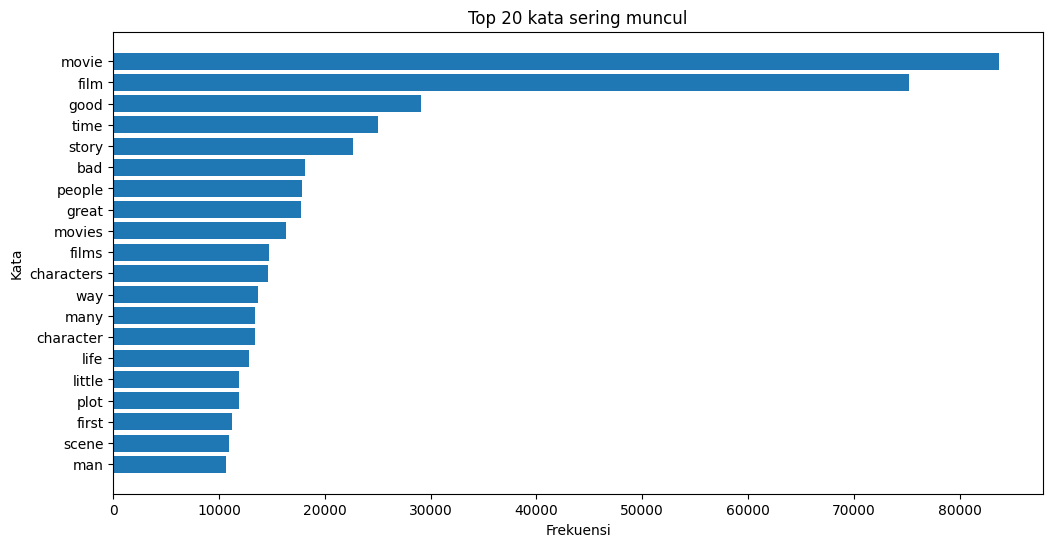

In [37]:
plt.figure(figsize=(12, 6))
plt.barh(top_words_bow.index, top_words_bow.values)
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.title("Top 20 kata sering muncul")
plt.gca().invert_yaxis()
plt.show()

### Word Cloud

In [38]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

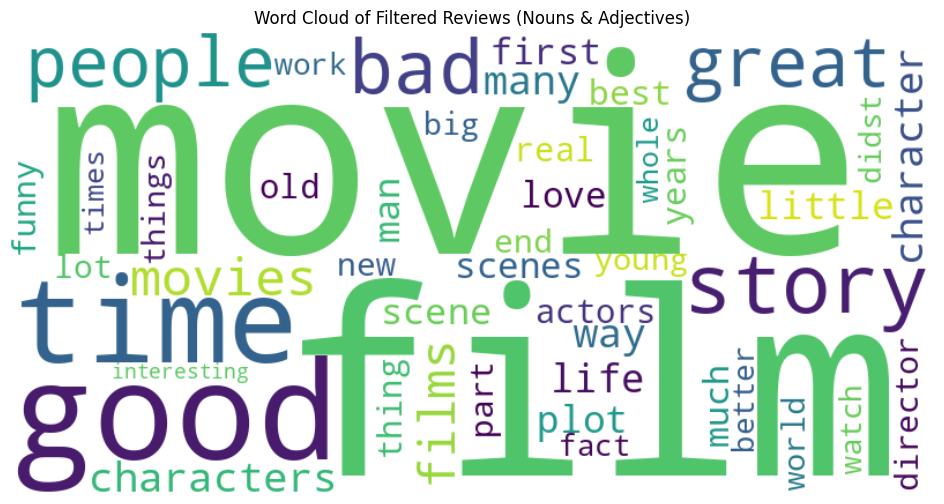

In [39]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frekuensi_kata)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Filtered Reviews (Nouns & Adjectives)")
plt.show()

### Menghapus stopwords kembali

karena kita sudah menghapus stopwords sebelumnya, kita perlu menghapus stopwords lagi untuk mendapatkan kata-kata yang lebih relevan dengan konteks objek yang dibahas yaitu seputar review suatu film. Dengan cara menambahkan beberapa stopwords ke dalam list stopwords yang sudah ada sebelumnya secara  manual.

In [40]:
# Stopwords dan custom stopwords
stop_words = set(stopwords)
custom_stopwords = {'movie', 'film', 'movies', 'films', 'many', 'didst'}
stop_words.update(custom_stopwords)


In [41]:
# Fungsi filtering
def filter_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered)

In [42]:
# Terapkan ke dataframe
data_review_cleaned['filtered_review2_spacy'] = data_review_cleaned['filtered_review_spacy'].apply(
	lambda x: filter_stopwords(' '.join(x)) if isinstance(x, list) else filter_stopwords(x)
)

In [43]:
data_review_cleaned

,cleaned_review,sentiment,spelling_errors,correct_spell_cleaned_review,filtered_review_spacy,filtered_review2_spacy
0,one reviewers mentioned watching oz episode yo...,1,"[{'word': 'manyaryans', 'position': 68}, {'wor...",one reviewers mentioned watching of episode yo...,"[reviewers, watching, episode, metre, first, t...",reviewers watching episode metre first thing b...
1,wonderful little production filming technique ...,1,"[{'word': 'oldtimebbc', 'position': 7}, {'word...",wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...,1,"[{'word': 'lovethis', 'position': 46}, {'word'...",thought wonderful way spend time hot summer we...,"[wonderful, way, time, hot, summer, weekend, a...",wonderful way time hot summer weekend air thea...
3,basically theres family little boy jake thinks...,0,"[{'word': 'timethis', 'position': 13}]",basically there family little boy jake thinks ...,"[family, little, boy, jake, closet, parents, t...",family little boy jake closet parents time slo...
4,petter matteis love time money visually stunni...,1,"[{'word': 'habitatthe', 'position': 69}, {'wor...",petter matters love time money visually stunni...,"[petter, matters, time, money, stunning, film,...",petter matters time money stunning watch matte...
...,...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,1,"[{'word': 'horriblecatwoman', 'position': 32},...",thought movie right good job want creative ori...,"[thought, movie, good, job, creative, original...",thought good job creative original whole lotta...
49996,bad plot bad dialogue bad acting idiotic direc...,0,"[{'word': 'fourthrate', 'position': 31}, {'wor...",bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti...",bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...,0,"[{'word': 'tragedythe', 'position': 84}, {'wor...",catholic taught parochial elementary schools n...,"[catholic, parochial, elementary, schools, nun...",catholic parochial elementary schools nuns jes...
49998,im going disagree previous comment side maltin...,0,"[{'word': 'mclaglens', 'position': 41}]",in going disagree previous comment side martin...,"[previous, comment, side, martin, second, rate...",previous comment side martin second rate vicio...


### Bag of Words 2

In [44]:
# Konversi text ke angka dengan BoW
vectorizer2 = CountVectorizer(max_features=None, min_df=0.1)
X_bow2 = vectorizer2.fit_transform(data_review_cleaned['filtered_review2_spacy']) # numpy array

In [45]:
df_bow2 = pd.DataFrame(X_bow2.toarray(), columns=vectorizer2.get_feature_names_out())
df_bow2.head()

,actors,bad,best,better,big,character,characters,director,end,fact,...,things,time,times,watch,way,whole,work,world,years,young
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,2,1,0,0,...,0,2,0,1,1,0,1,1,0,0


### Feature visualization 2

In [46]:
frekuensi_kata2 = df_bow2.sum().sort_values(ascending=False)
top_words_bow2 = frekuensi_kata2.head(20)

### Bar plot 2

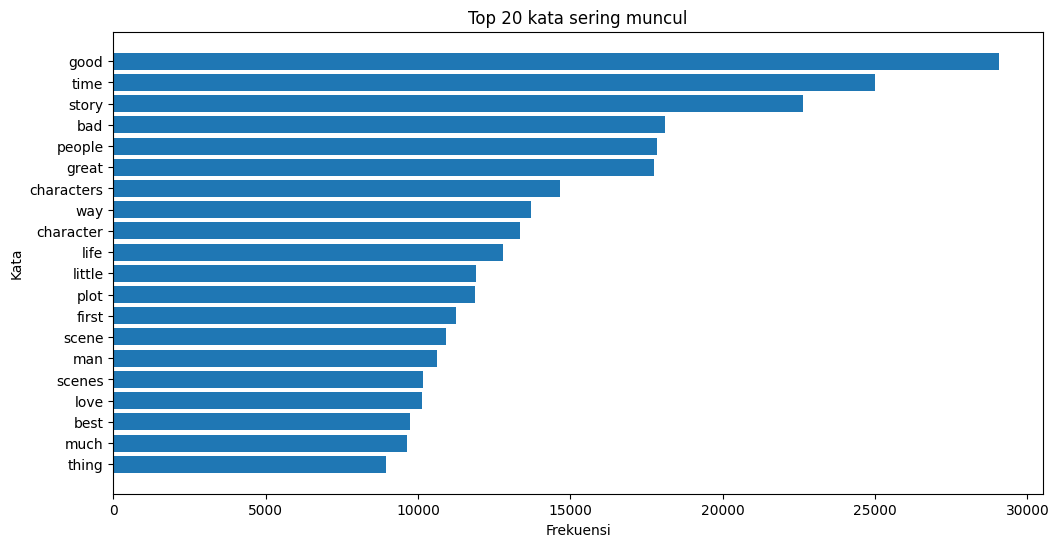

In [47]:
plt.figure(figsize=(12, 6))
plt.barh(top_words_bow2.index, top_words_bow2.values)
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.title("Top 20 kata sering muncul")
plt.gca().invert_yaxis()
plt.show()

### Word Cloud 2

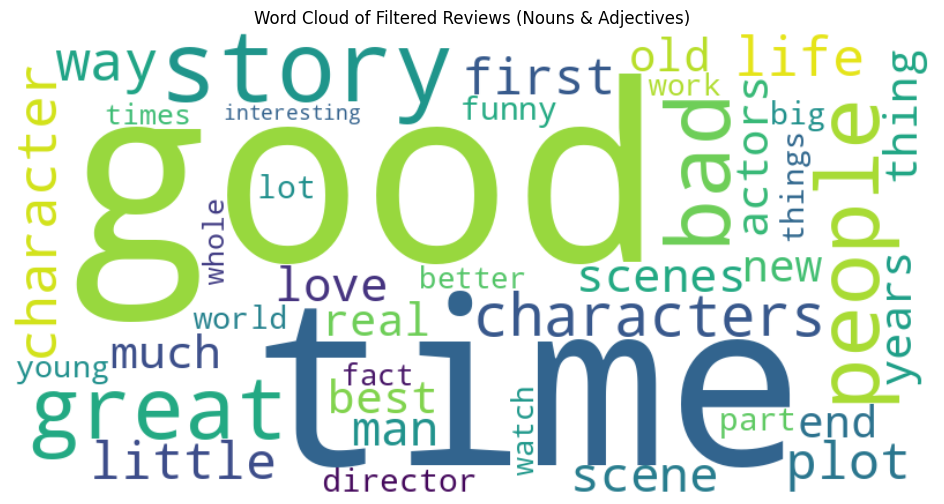

In [48]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud Visualization
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frekuensi_kata2)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Filtered Reviews (Nouns & Adjectives)")
plt.show()